<Axes: xlabel='Month (in a year)', ylabel='Monthly Mean Total Sunspot Number'>

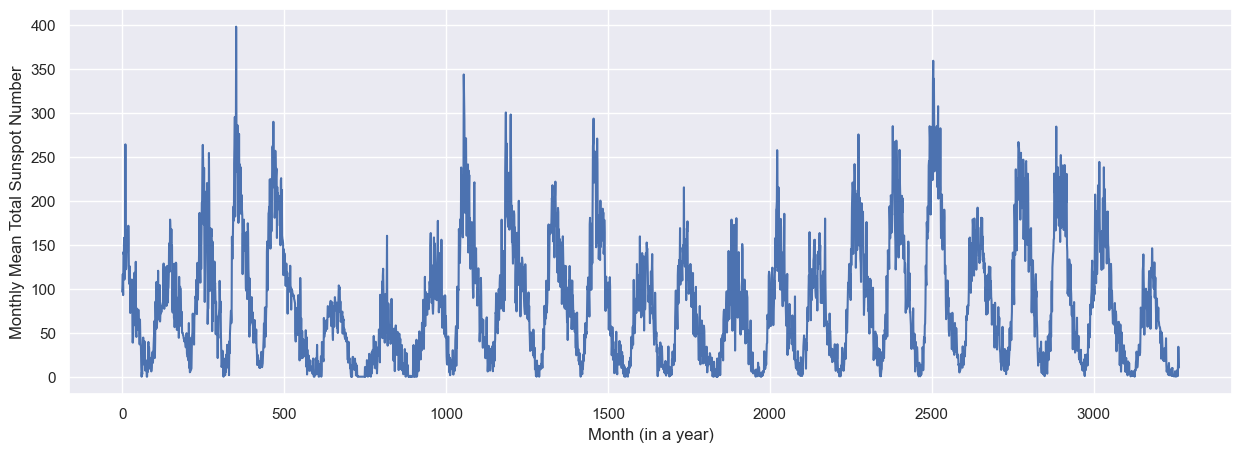

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sunspots.csv")
df.drop(columns = 'Unnamed: 0',inplace = True)
df.plot(figsize = (15,5), grid = True, xlabel = 'Month (in a year)', ylabel = 'Monthly Mean Total Sunspot Number', legend = False)

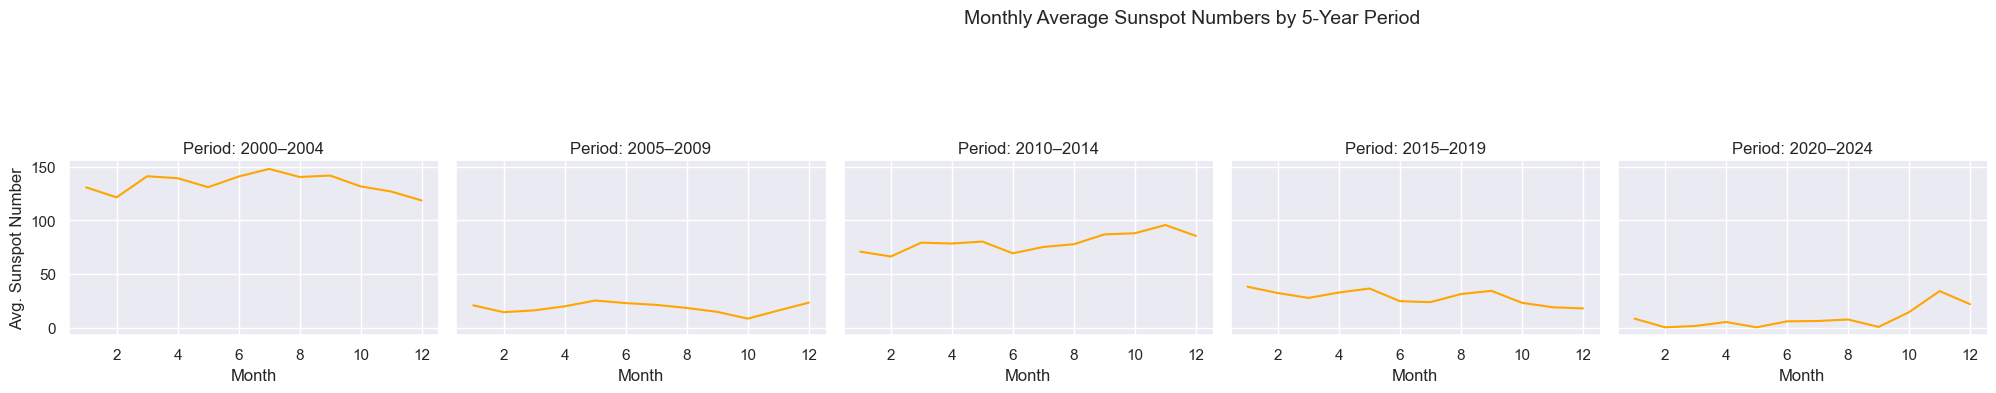

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})

# Focus on data from 1950 onwards
df_recent = df[df['Year'] >= 2000].copy()

# Create 5-year period labels (e.g., 1950–1954 → Period = 1950)
df_recent['Period'] = (df_recent['Year'] // 5) * 5

# Calculate average sunspot number per month for each 5-year period
df_grouped = df_recent.groupby(['Period', 'Month'])['SunspotNumber'].mean().reset_index()

# Plot using Seaborn FacetGrid
g = sns.FacetGrid(df_grouped, col="Period", col_wrap=6, height=4, aspect=1)
g.map(sns.lineplot, "Month", "SunspotNumber", color="orange")
g.set_axis_labels("Month", "Avg. Sunspot Number")

# Customize facet titles to show "Period: 1950–1954", etc.
for ax, period in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Period: {int(period)}–{int(period)+4}")

plt.subplots_adjust(top=0.6)
g.fig.suptitle("Monthly Average Sunspot Numbers by 5-Year Period", fontsize=14)
plt.show()

In [3]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'